# EDA Student Performance Indicator

### 1) Problem statement
- This project understands how the student's performance (test scores) is affected by other variables such as Gender, Ethnicity, Parental level of education, Lunch and Test preparation course.


### 2) Data Collection
- Dataset Source - https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?datasetId=74977
- The data consists of 8 column and 1000 rows.

### 3) Dataset Information
- gender : sex of students  -> (Male/female)
- race/ethnicity : ethnicity of students -> (Group A, B,C, D,E)
- parental level of education : parents' final education ->(bachelor's degree,some college,master's degree,associate's degree,high school)
- lunch : having lunch before test (standard or free/reduced) 
- test preparation course : complete or not complete before test
- math score
- reading score
- writing scored

In [18]:
import numpy as np

import pandas as pd

import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline

# To remove all warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Read the dataset
df=pd.read_csv('stud.csv')
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
df.shape

(1000, 8)

# 3. Data Checks to perform

- Check Missing values
- Check Duplicates
- Check data type
- Check the number of unique values of each column
- Check statistics of data set
- Check various categories present in the different categorical column

In [5]:
## check missing Values
df.isnull().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

In [7]:
## check missing Values [both means the same]
df.isna().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

In [8]:
## Check Duplicates
df.duplicated().sum()

0

In [9]:
## check datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [10]:
## 3.1 Checking the number of uniques values of each columns
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

In [11]:
## Check the statistics of the dataset
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


# Insights or Observation
- From the above description of numerical data,all means are very close to each other- between 66 and 69
- All the standard deviation are also close- between 14.6- 15.19
- While there is a minimum of 0 for maths,other are having 17 and 10 value

In [14]:
# this is all my numerical feature

num_feature = [col for col in df.columns if df[col].dtype!='object']
num_feature

['math_score', 'reading_score', 'writing_score']

In [15]:
# this is all my categorical feature

cat_feature = [col for col in df.columns if df[col].dtype=='object']
cat_feature

['gender',
 'race_ethnicity',
 'parental_level_of_education',
 'lunch',
 'test_preparation_course']

In [16]:
# create 2 columns -> "total_score" and "avg_score" 

df["total_score"] = (df["math_score"]+df["reading_score"]+df["writing_score"])
df["avg_score"] = df["total_score"]/3

df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,avg_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


# Explore More Visualization

In [ ]:
# syntax:
# plt.subplot(nrows, ncols, index, **kwargs)

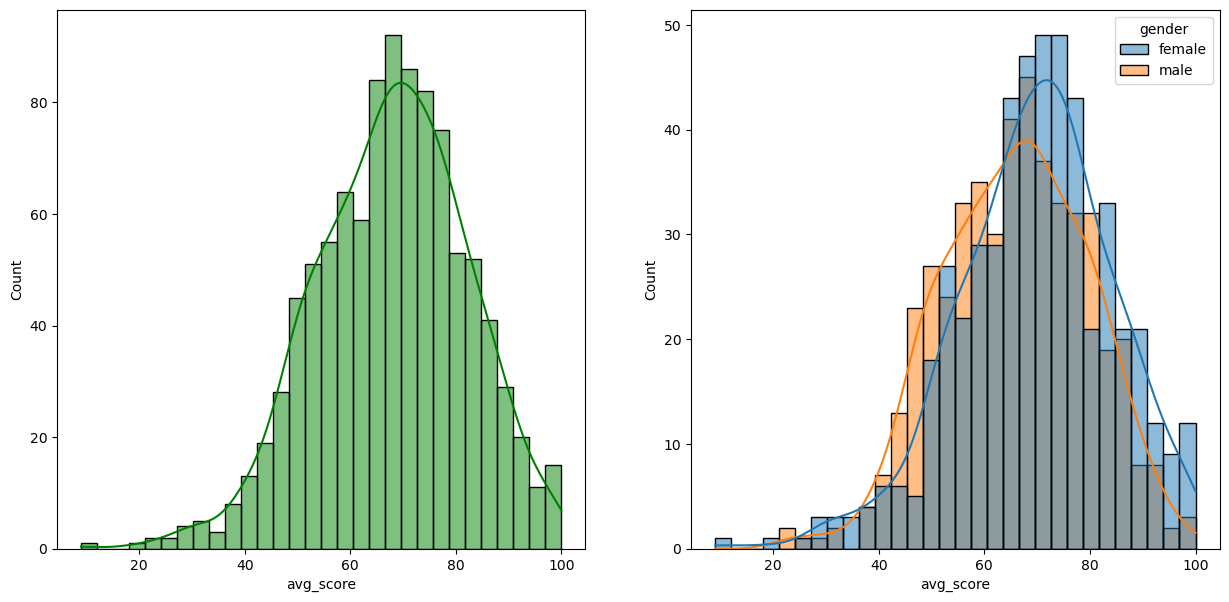

In [20]:
fig,axis=plt.subplots(1,2,figsize=(15,7))
# 1st box
plt.subplot(121)
sns.histplot(data=df,x='avg_score',bins=30,kde=True,color='g')

# 2nd box [based on gender feature]
plt.subplot(122)
sns.histplot(data=df,x='avg_score',bins=30,kde=True,hue='gender')

plt.show()

# Insights 1
- Female student tend to perform well than male students

In [ ]:
# check this link for fig,axis
https://stackoverflow.com/questions/34162443/why-do-many-examples-use-fig-ax-plt-subplots

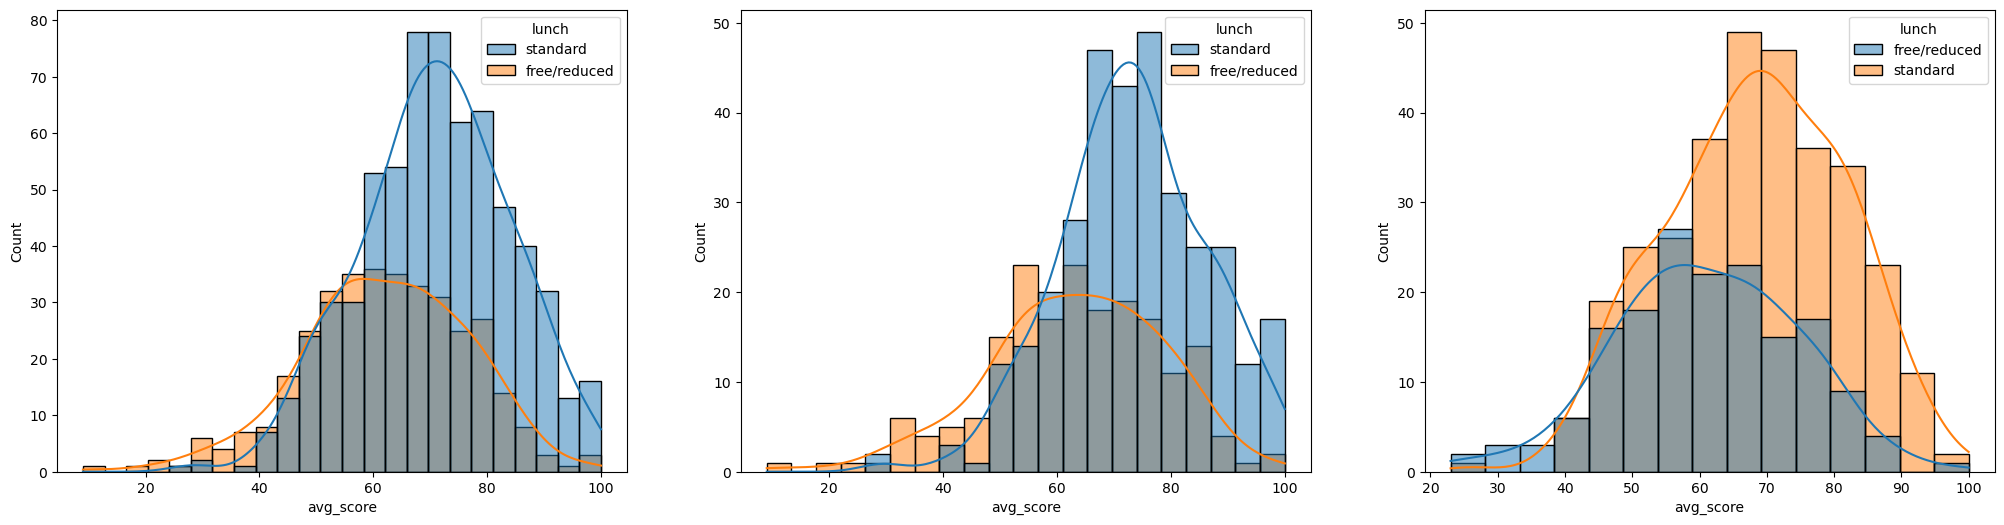

In [25]:
plt.subplots(1,3,figsize=(25,6))

# fig1: [avg_score based on 'lunch']
plt.subplot(131)
sns.histplot(data=df,x='avg_score',kde=True,hue='lunch')

# fig2: [avg_score of females based on 'lunch']
plt.subplot(132)
sns.histplot(data=df[df.gender=='female'],x='avg_score',kde=True,hue='lunch')

# fig3: [avg_score of males based on 'lunch']
plt.subplot(133)
sns.histplot(data=df[df.gender=='male'],x='avg_score',kde=True,hue='lunch')

plt.show()

# Insights 2
- Standard Lunch help students perform well in exams
- Standard lunch helps perform well in exams be it a male or female

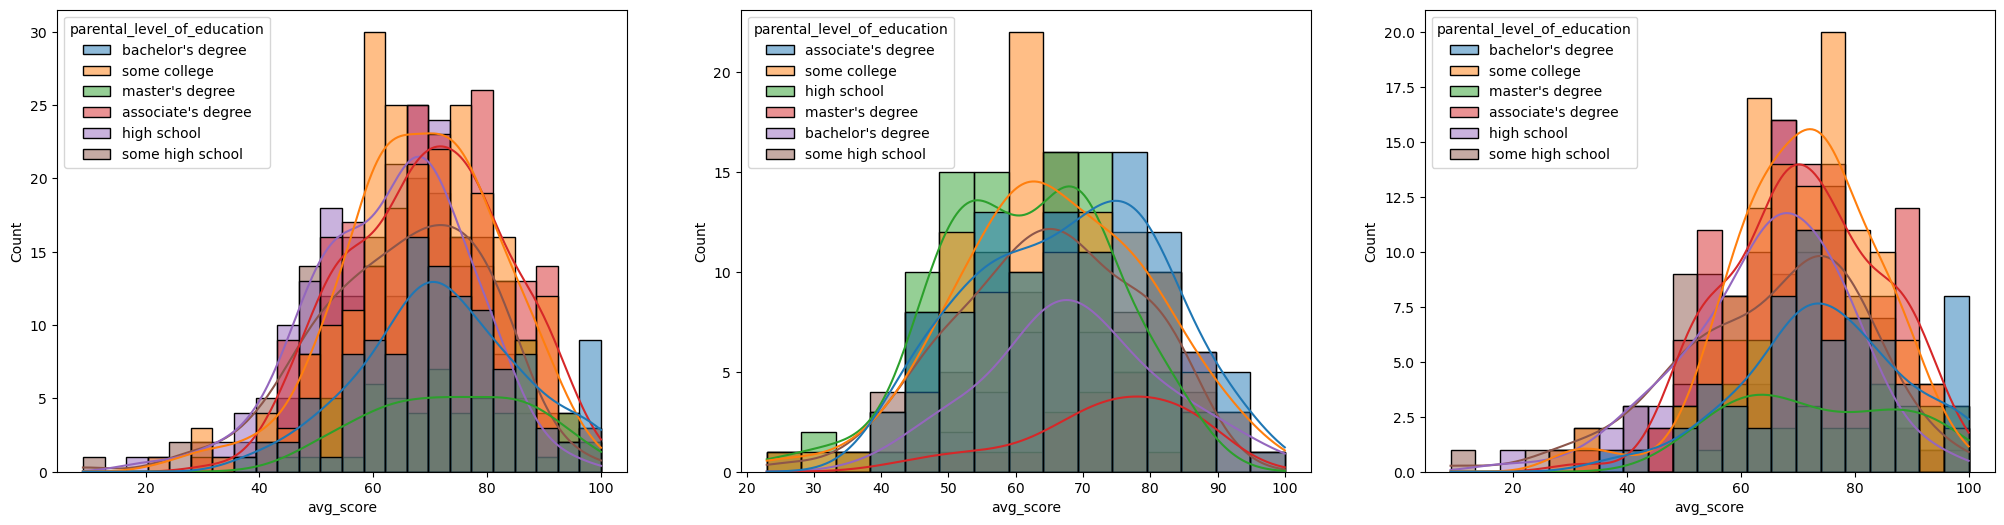

In [31]:
plt.subplots(1,3,figsize=(25,6))

# fig1: [avg_score based on 'parental_level_of_education']
plt.subplot(131)
ax =sns.histplot(data=df,x='avg_score',kde=True,hue='parental_level_of_education')

# fig2: [avg_score of males based on 'parental_level_of_education']
plt.subplot(132)
ax =sns.histplot(data=df[df.gender=='male'],x='avg_score',kde=True,hue='parental_level_of_education')

# fig3: [avg_score of females based on 'parental_level_of_education']
plt.subplot(133)
ax =sns.histplot(data=df[df.gender=='female'],x='avg_score',kde=True,hue='parental_level_of_education')

plt.show()

#  Insights
- In general parent's education don't help student perform well in exam.
- 2nd plot shows that parent's whose education is of associate's degree or master's degree their male child tend to perform well in exam (left skewed in both degree)
- 3rd plot we can see there is no effect of parent's education on female students.

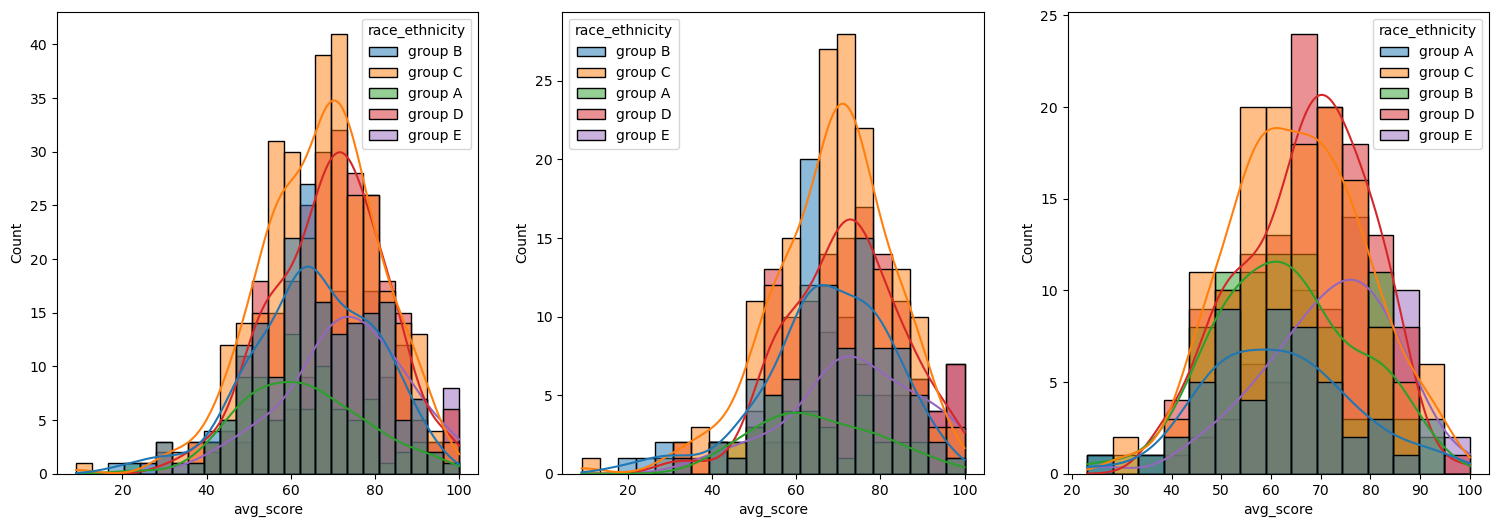

In [36]:
plt.subplots(1,3,figsize=(25,6))

# fig1: [avg_score based on 'race_ethnicity']
plt.subplot(141)
ax =sns.histplot(data=df,x='avg_score',kde=True,hue='race_ethnicity')

# fig2: [avg_score of females based on 'race_ethnicity']
plt.subplot(142)
ax =sns.histplot(data=df[df.gender=='female'],x='avg_score',kde=True,hue='race_ethnicity')

# fig3: [avg_score of males based on 'race_ethnicity']
plt.subplot(143)
ax =sns.histplot(data=df[df.gender=='male'],x='avg_score',kde=True,hue='race_ethnicity')

plt.show()

#  Insights
- Students of group A and group B tends to perform poorly in exam. (right skewed)
- Students of group A and group B tends to perform poorly in exam irrespective of whether they are male or female. (right skewed)

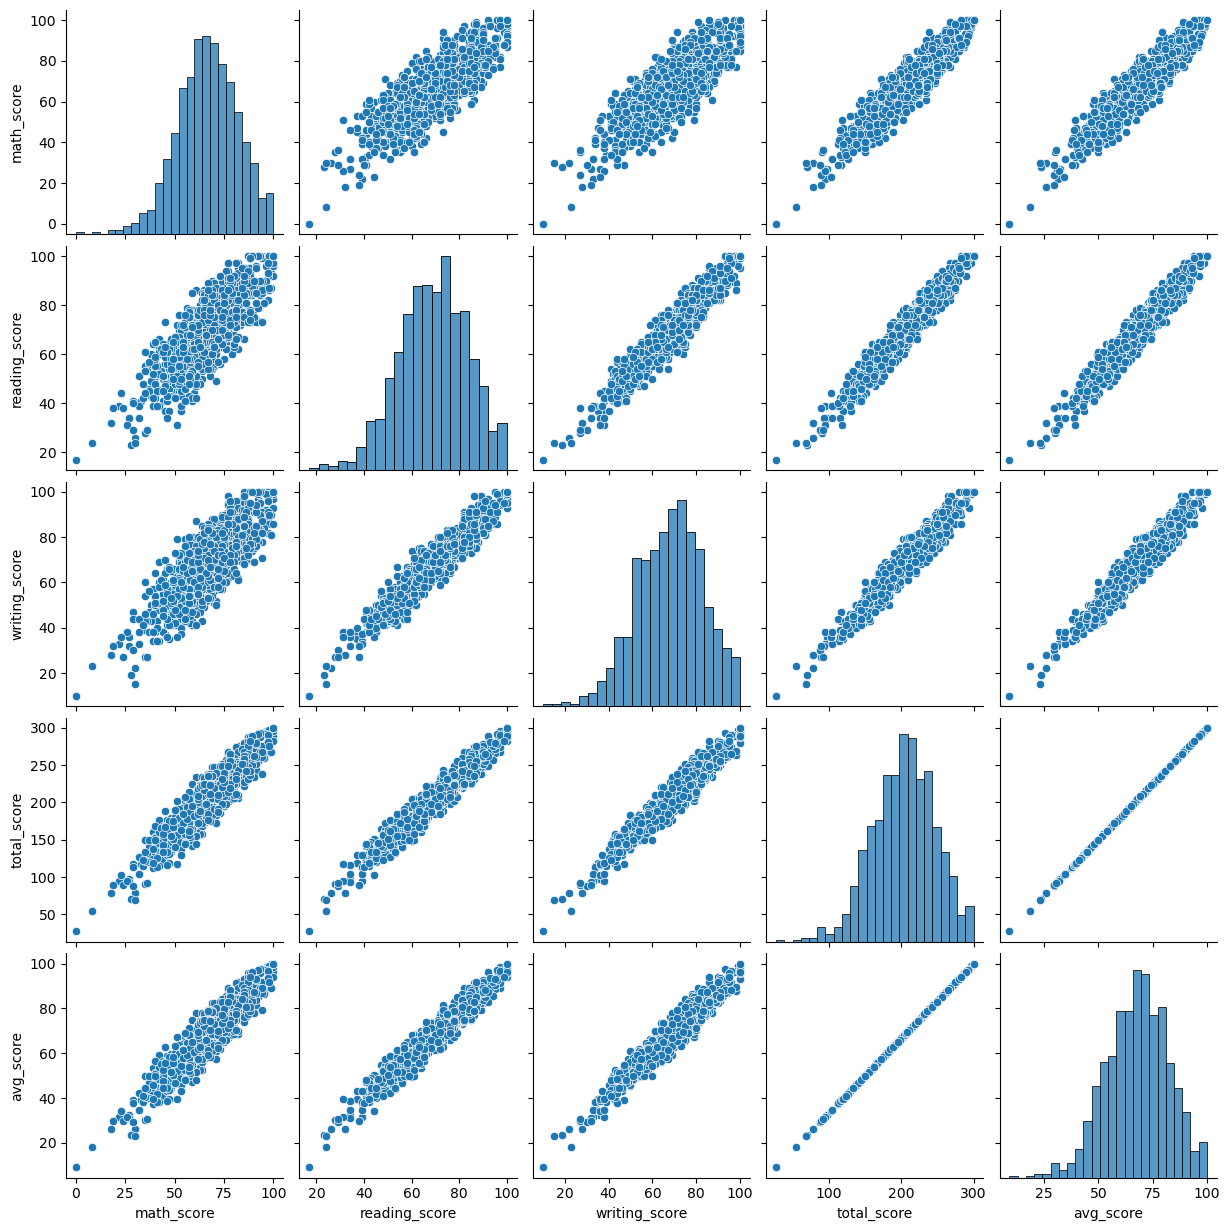

In [33]:
# for numerical feature
sns.pairplot(df)

<Axes: >

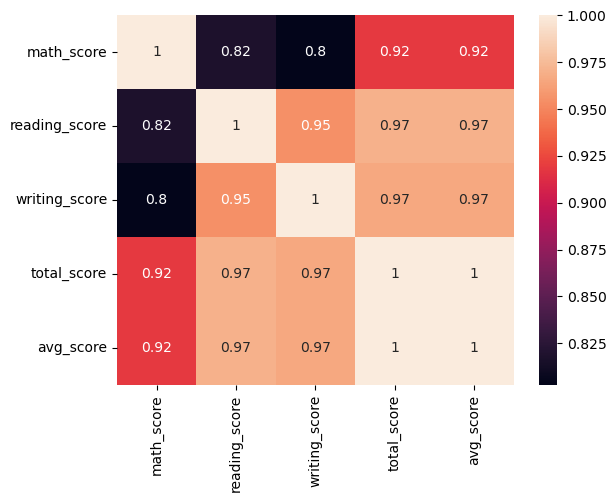

In [37]:
# check correlation
sns.heatmap(df.corr(),annot=True)

In [38]:
# HIGHLY CORRELATED!